In [1]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bin import load_bgi as ld
from bin import utils

In [27]:
sample_dir = "/home/zhanghr/seq/SPAC-seq/stereo/T-70/RNA/"

In [26]:
A_df = pd.read_csv("/home/zhanghr/seq/SPAC-seq/stereo/T-70/RNA/A04091E1/A04091E1.lasso.bin1.Label1.gem.gz", comment='#', sep='\t')

In [28]:
B_df = pd.read_csv("/home/zhanghr/seq/SPAC-seq/stereo/T-70/RNA/B03903E6/B03903E6.lasso.bin1.Label1.gem.gz", comment='#', sep='\t')

In [33]:
Ag_df = pd.read_csv("A04091E1.guide.gem", comment='#', sep='\t', index_col=0)

In [40]:
Bg_df = pd.read_csv("B03903E6.guide.gem", comment='#', sep='\t', index_col=0)

In [41]:
Ao_df = pd.concat([A_df, Ag_df], axis=0)
Bo_df = pd.concat([B_df, Bg_df], axis=0)

In [44]:
Ao_df.to_csv("./RNA/A04091E1.combined.cut.gem", index=False, sep='\t')
Bo_df.to_csv("./RNA/B03903E6.combined.cut.gem", index=False, sep='\t')

# load data

In [2]:
fdata_t = ld.load_bin("./raw/sgRNA/B03903E6.offset.gem", bin_size=20, library_id="spatial")
cdata_t = ld.load_bin("/home/zhanghr/seq/SPAC-seq/stereo/T-70/RNA/A04091E1/A04091E1.lasso.bin1.Label1.gem.gz", bin_size=20, library_id="spatial")

In [6]:
fdata_y = ld.load_bin("./raw/sgRNA/A04091E1.offset.gem", bin_size=20, library_id="spatial")
cdata_y = ld.load_bin("/home/zhanghr/seq/SPAC-seq/stereo/T-70/RNA/B03903E6/B03903E6.lasso.bin1.Label1.gem.gz", bin_size=20, library_id="spatial")

In [9]:
fdata_y_1 = ld.load_bin("./seekseq/B646_out_/B646-merge/04.output/B03903E6.gem", bin_size=20, library_id="spatial")
fdata_y = ld.load_bin("./seekseq/B646_out/B646-merge/04.output/A04091E1.offset.gem", bin_size=20, library_id="spatial")
fdata_t = ld.load_bin("./seekseq/B647_out/B647-merge/04.output/B03903E6.offset.gem", bin_size=20, library_id="spatial")
fdata_t_1 = ld.load_bin("./seekseq/B647_out_/B647-merge/04.output/A04091E1.gem", bin_size=20, library_id="spatial")

In [13]:
cdata_y_1 = ld.load_bin("/home/zhanghr/seq/SPAC-seq/stereo/T-70/RNA/B03903E6/B03903E6.gem.gz", bin_size=20, library_id="spatial")
cdata_t_1 = ld.load_bin("/home/zhanghr/seq/SPAC-seq/stereo/T-70/RNA/A04091E1/A04091E1.gem.gz", bin_size=20, library_id="spatial")

In [45]:
cdata1_bin20 = ld.load_bin("./RNA/A04091E1.combined.cut.gem", bin_size=20, library_id="spatial")
cdata2_bin20 = ld.load_bin("./RNA/B03903E6.combined.cut.gem", bin_size=20, library_id="spatial")
print("bin20")

cdata1_bin100 = ld.load_bin("./RNA/A04091E1.combined.cut.gem", bin_size=100, library_id="spatial")
cdata2_bin100 = ld.load_bin("./RNA/B03903E6.combined.cut.gem", bin_size=100, library_id="spatial")

bin20


In [46]:
cdata1_bin20.obs["marker"] = 'A'
cdata2_bin20.obs["marker"] = 'B'

cdata1_bin100.obs["marker"] = 'A'
cdata2_bin100.obs["marker"] = 'B'

In [49]:
cdata_bin20 = sc.concat([cdata1_bin20, cdata2_bin20])
cdata_bin20.obs_names_make_unique()

cdata_bin100 = sc.concat([cdata1_bin100, cdata2_bin100])
cdata_bin100.obs_names_make_unique()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [51]:
cdata_bin20.write_h5ad("./RNA/spatial.combined.bin20.h5")
cdata_bin100.write_h5ad("./RNA/spatial.combined.bin100.h5")

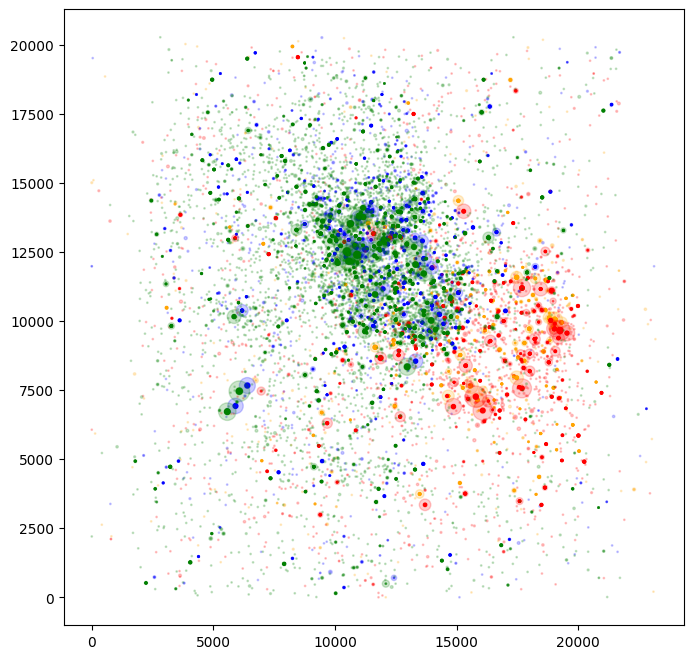

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
for idx, guide in enumerate(fdata_t.var_names):
     utils.plot_dot(fdata_t[fdata_t[:, guide].X.toarray() > 0], guide, ax=ax, square=False, color="Orange")
for idx, guide in enumerate(fdata_y.var_names):
     utils.plot_dot(fdata_y[fdata_y[:, guide].X.toarray() > 0], guide, ax=ax, square=False, color="Blue")
for idx, guide in enumerate(fdata_y_1.var_names):
     utils.plot_dot(fdata_y_1[fdata_y_1[:, guide].X.toarray() > 0], guide, ax=ax, square=False, color="Red")
for idx, guide in enumerate(fdata_t_1.var_names):
     utils.plot_dot(fdata_t_1[fdata_t_1[:, guide].X.toarray() > 0], guide, ax=ax, square=False, color="Green")

In [19]:
sc.pp.calculate_qc_metrics(cdata_t_2, inplace=True)

In [52]:
def extract_guide_from_rna(cdata):
    sg_genes = cdata.var_names[cdata.var_names.str.startswith("sg")]
    rna_genes = cdata.var_names[~cdata.var_names.str.startswith("sg")]
    guidedata = cdata[:, sg_genes]
    rnadata = cdata[:, rna_genes]
    return rnadata, guidedata

In [54]:
rnadata, guidedata = extract_guide_from_rna(cdata_bin20)

In [60]:
rnadata_1 = rnadata[rnadata.obs["marker"] == 'A']
rnadata_2 = rnadata[rnadata.obs["marker"] == 'B']

guidedata_1 = guidedata[guidedata.obs["marker"] == 'A']
guidedata_2 = guidedata[guidedata.obs["marker"] == 'B']

In [62]:
guidedata_2

View of AnnData object with n_obs × n_vars = 101528 × 64
    obs: 'marker'
    obsm: 'spatial'

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/tmp/ipykernel_13071/4213463813.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("jet")


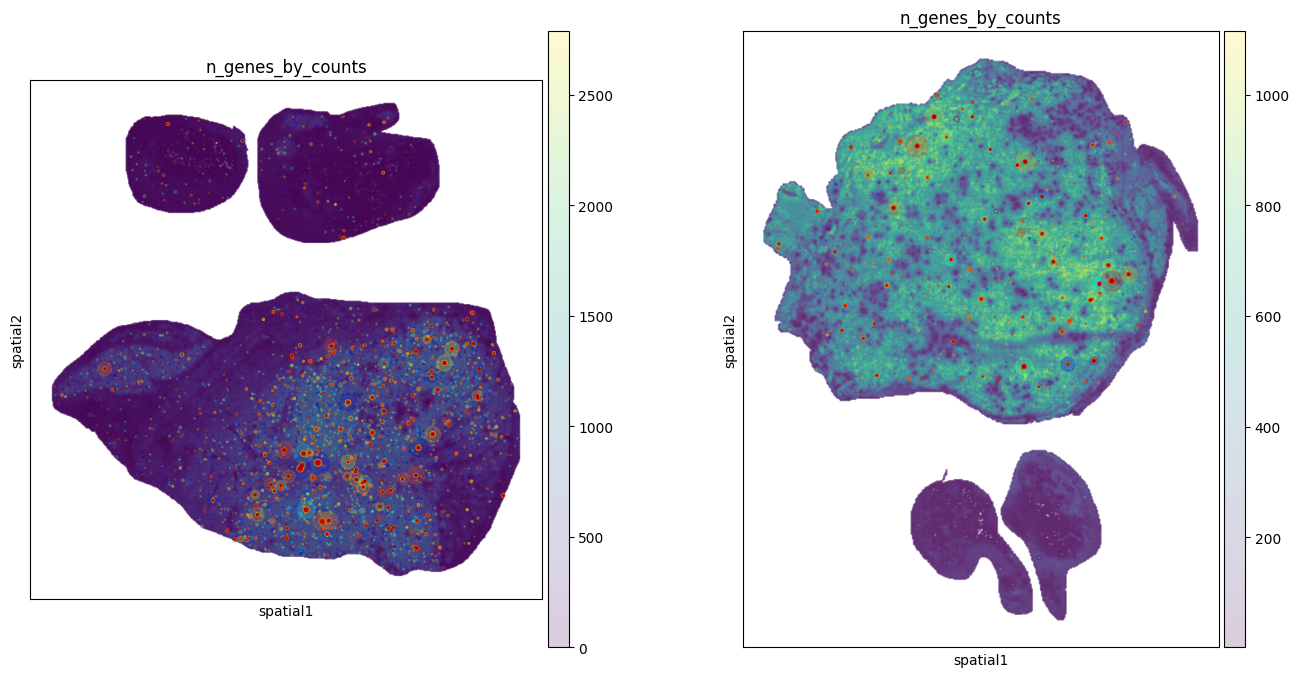

In [64]:
import matplotlib.cm as cm
if "n_genes_by_counts" not in rnadata_1.obs.columns:
     sc.pp.calculate_qc_metrics(rnadata_1, inplace=True)
if "n_genes_by_counts" not in rnadata_2.obs.columns:
     sc.pp.calculate_qc_metrics(rnadata_2, inplace=True)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
colormap = cm.get_cmap("jet")
colors = colormap(np.linspace(0, 1, len(guidedata_2.var_names)))
sq.pl.spatial_scatter(rnadata_1, color="n_genes_by_counts", size=2, shape=None, library_id="spatial", ax=ax[0], alpha=0.2, cmap="viridis")
sq.pl.spatial_scatter(rnadata_2, color="n_genes_by_counts", size=2, shape=None, library_id="spatial", ax=ax[1], alpha=0.2, cmap="viridis")
for idx, guide in enumerate(guidedata_1.var_names):
     utils.plot_dot(guidedata_1[guidedata_1[:, guide].X.toarray() > 0], guide, ax=ax[0], square=False, color=colors[idx])
for idx, guide in enumerate(guidedata_2.var_names):
     utils.plot_dot(guidedata_2[guidedata_2[:, guide].X.toarray() > 0], guide, ax=ax[1], square=False, color=colors[idx])

/tmp/ipykernel_13071/2410277088.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("jet")


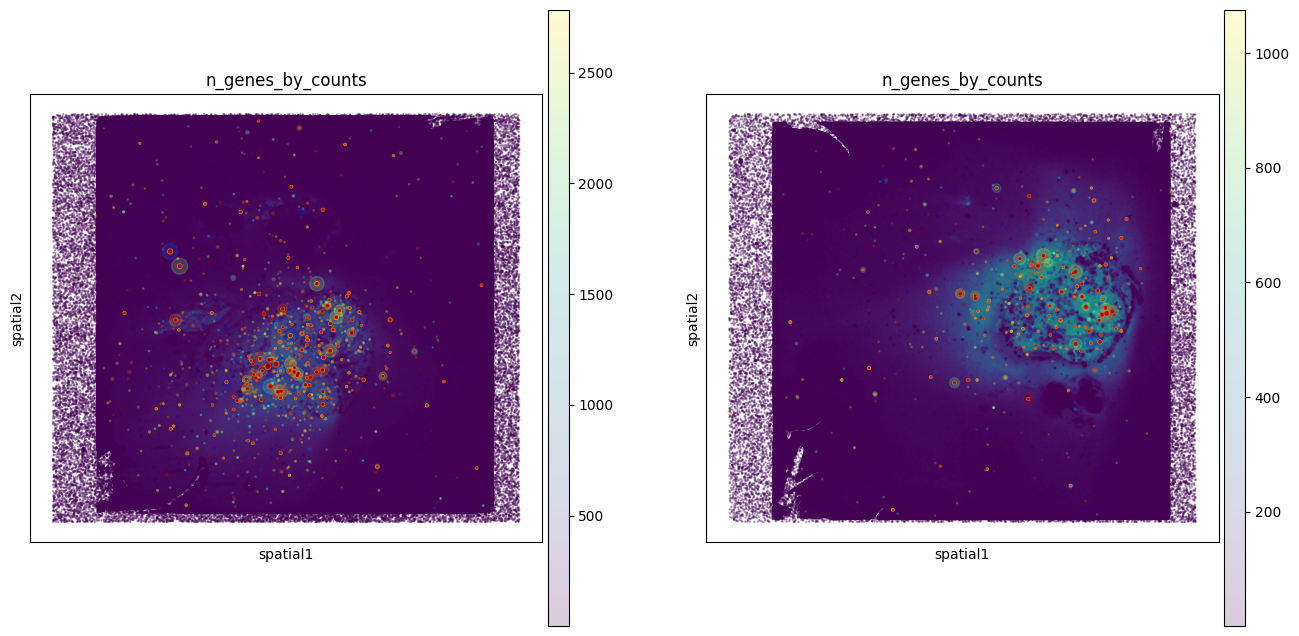

In [15]:
import matplotlib.cm as cm
if "n_genes_by_counts" not in cdata_t_1.obs.columns:
     sc.pp.calculate_qc_metrics(cdata_t_1, inplace=True)
if "n_genes_by_counts" not in cdata_y_1.obs.columns:
     sc.pp.calculate_qc_metrics(cdata_y_1, inplace=True)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
colormap = cm.get_cmap("jet")
colors = colormap(np.linspace(0, 1, len(fdata_y.var_names)))
sq.pl.spatial_scatter(cdata_t_1, color="n_genes_by_counts", size=2, shape=None, library_id="spatial", ax=ax[0], alpha=0.2, cmap="viridis")
sq.pl.spatial_scatter(cdata_y_1, color="n_genes_by_counts", size=2, shape=None, library_id="spatial", ax=ax[1], alpha=0.2, cmap="viridis")
for idx, guide in enumerate(fdata_t.var_names):
     utils.plot_dot(fdata_t[fdata_t[:, guide].X.toarray() > 0], guide, ax=ax[1], square=False, color=colors[idx])
for idx, guide in enumerate(fdata_y.var_names):
     utils.plot_dot(fdata_y[fdata_y[:, guide].X.toarray() > 0], guide, ax=ax[0], square=False, color=colors[idx])

In [16]:
fdata_t.write_h5ad("./RNA/spatial.B03903E6.guide.h5")
fdata_y.write_h5ad("./RNA/spatial.A04091E1.guide.h5")
cdata_y.write_h5ad("./RNA/spatial.B03903E6.cut.h5")
cdata_t.write_h5ad("./RNA/spatial.A04091E1.cut.h5")

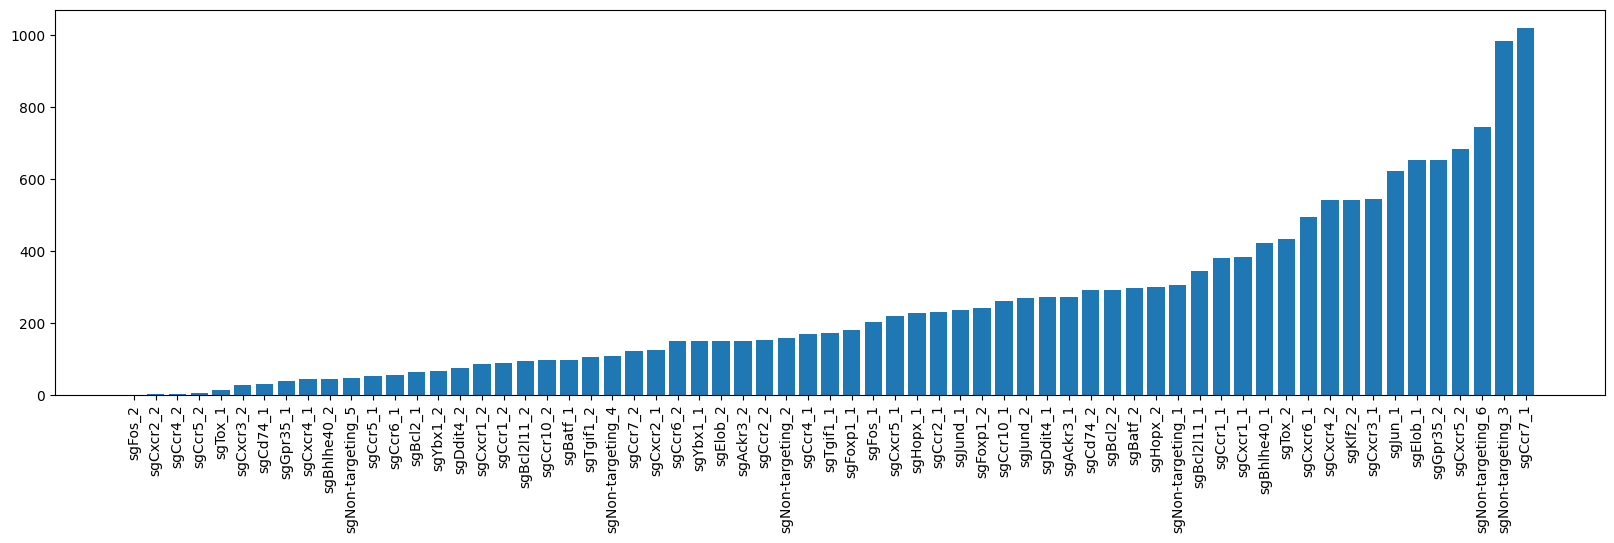

In [10]:
plt.figure(figsize=(20, 5))
df = pd.DataFrame(np.array(fdata_t.X.sum(axis=0)).flatten(), index=fdata_t.var_names)
df.sort_values(by=0, inplace=True)
plt.bar(x=df.index, height=df[0])
plt.xticks(rotation=90)
plt.show()

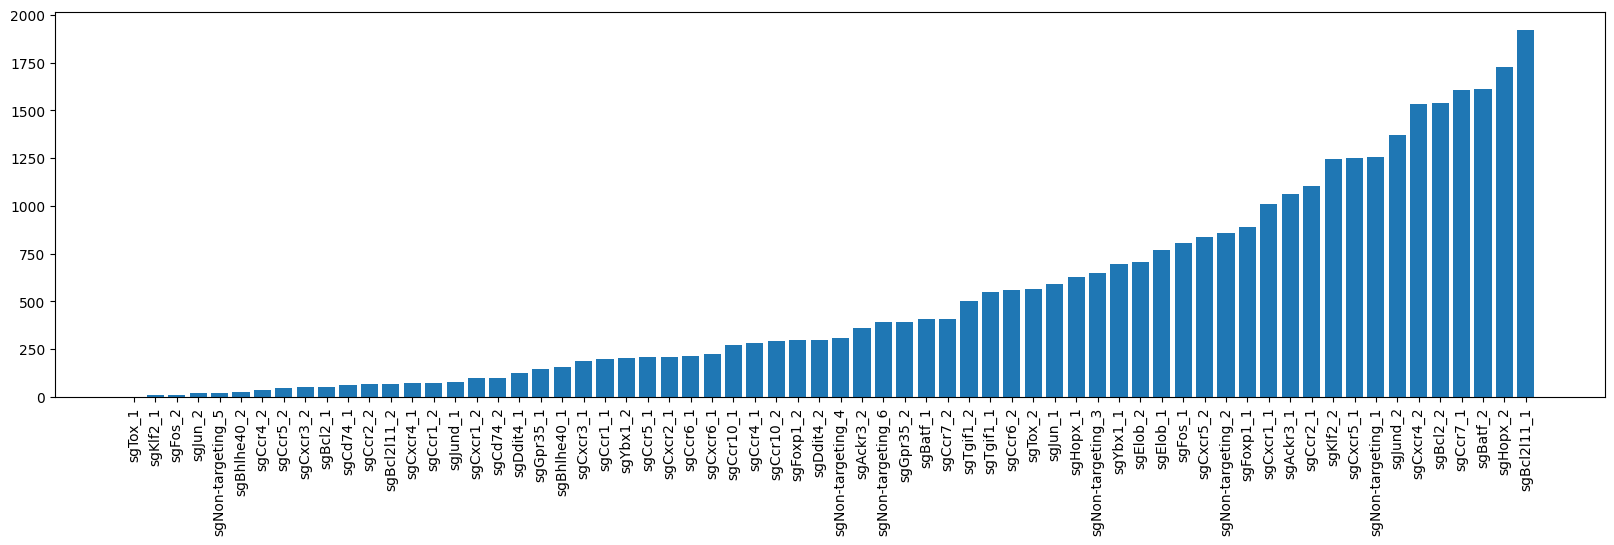

In [11]:
plt.figure(figsize=(20, 5))
df = pd.DataFrame(np.array(fdata_y.X.sum(axis=0)).flatten(), index=fdata_y.var_names)
df.sort_values(by=0, inplace=True)
plt.bar(x=df.index, height=df[0])
plt.xticks(rotation=90)
plt.show()

In [70]:
sc.pp.calculate_qc_metrics?

Signature:
sc.pp.calculate_qc_metrics(
    adata: anndata._core.anndata.AnnData,
    *,
    expr_type: str = 'counts',
    var_type: str = 'genes',
    qc_vars: Collection[str] = (),
    percent_top: Optional[Collection[int]] = (50, 100, 200, 500),
    layer: Optional[str] = None,
    use_raw: bool = False,
    inplace: bool = False,
    log1p: bool = True,
    parallel: Optional[bool] = None,
) -> Optional[Tuple[pandas.core.frame.DataFrame, pandas.core.frame.DataFrame]]
Docstring:
Calculate quality control metrics.

Calculates a number of qc metrics for an AnnData object, see section
`Returns` for specifics. Largely based on `calculateQCMetrics` from scater
[McCarthy17]_. Currently is most efficient on a sparse CSR or dense matrix.

Note that this method can take a while to compile on the first call. That
result is then cached to disk to be used later.

Parameters
----------
adata : AnnData
    Annotated data matrix.
expr_type : str, optional (default: 'counts')
    Name of kind of va

In [15]:
sc.pp.calculate_qc_metrics(cdata_1, inplace=True)
sc.pp.calculate_qc_metrics(cdata_2, inplace=True)

In [60]:
cdata_1

AnnData object with n_obs × n_vars = 180151 × 22840
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

/tmp/ipykernel_62832/3852722367.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("jet")


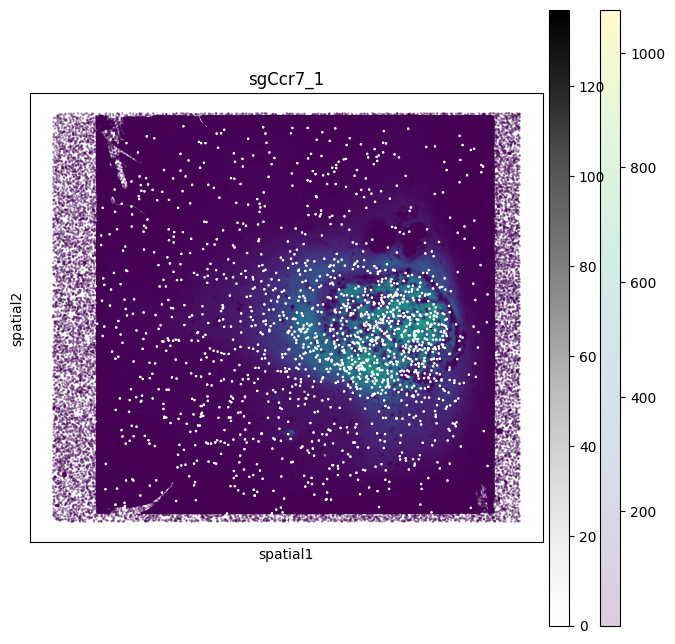

In [17]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
colormap = cm.get_cmap("jet")
colors = colormap(np.linspace(0, 1, len(fdata_t.var_names)))
sq.pl.spatial_scatter(cdata_2, color="n_genes_by_counts", size=2, shape=None, library_id="spatial", ax=ax, alpha=0.2, cmap="viridis")
sq.pl.spatial_scatter(fdata_t, color="sgCcr7_1", size=2, shape=None, library_id="spatial", ax=ax, cmap="Greys")
#for idx, guide in enumerate(fdata_t.var_names):
     #utils.plot_dot(fdata_t[fdata_t[:, guide].X.toarray() > 0], guide, ax=ax, square=False, color=colors[idx])

/tmp/ipykernel_62832/1770877992.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("jet")


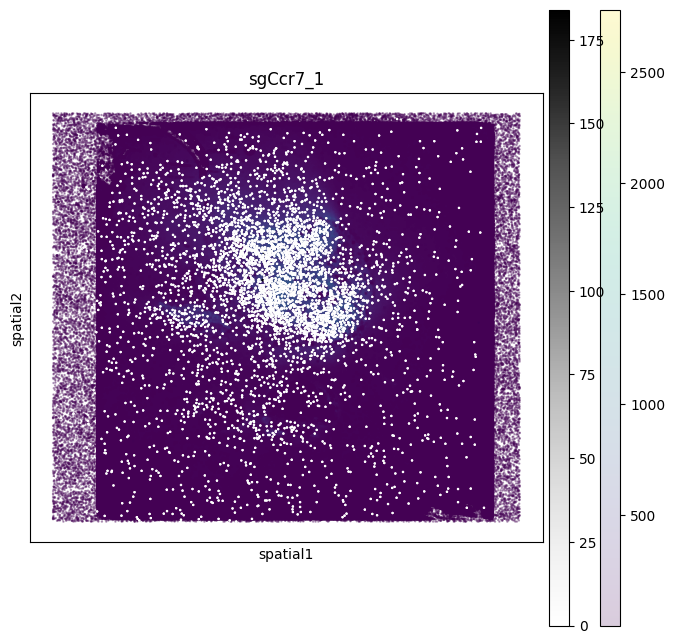

In [18]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
colormap = cm.get_cmap("jet")
colors = colormap(np.linspace(0, 1, len(fdata_t.var_names)))
sq.pl.spatial_scatter(cdata_1, color="n_genes_by_counts", size=2, shape=None, library_id="spatial", ax=ax, alpha=0.2, cmap="viridis")
sq.pl.spatial_scatter(fdata_y, color="sgCcr7_1", size=2, shape=None, library_id="spatial", ax=ax, cmap="Greys")
#for idx, guide in enumerate(fdata_t.var_names):
     #utils.plot_dot(fdata_t[fdata_t[:, guide].X.toarray() > 0], guide, ax=ax, square=False, color=colors[idx])

/tmp/ipykernel_43013/2927452871.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("jet")


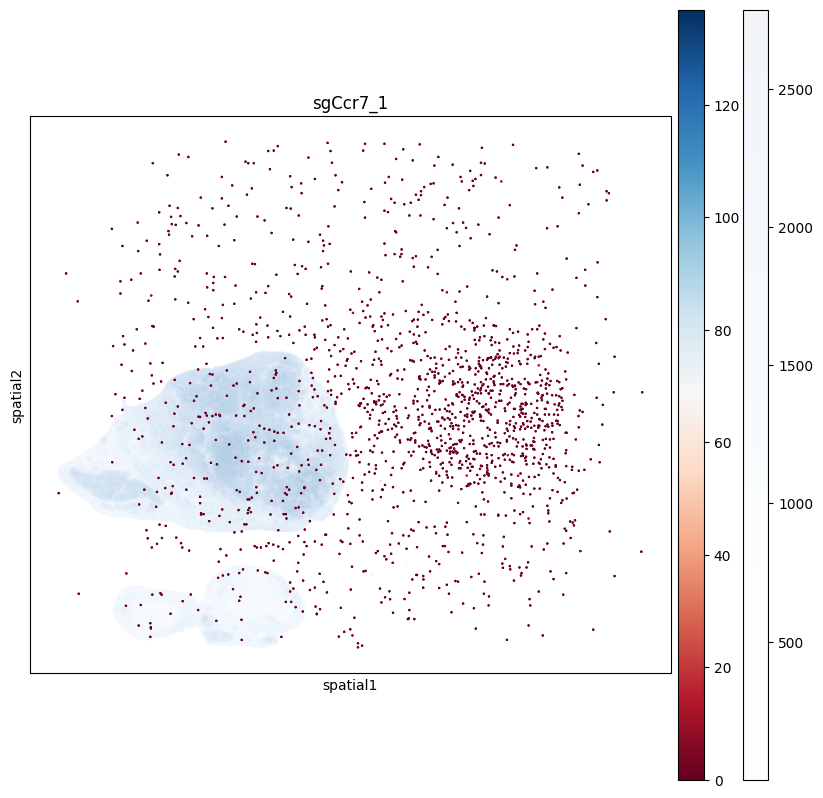

In [113]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colormap = cm.get_cmap("jet")
colors = colormap(np.linspace(0, 1, len(fdata_t.var_names)))
sq.pl.spatial_scatter(cdata_t, color="n_genes_by_counts", size=2, shape=None, library_id="spatial", ax=ax, alpha=0.05, cmap="Blues")
sq.pl.spatial_scatter(fdata_t, color="sgCcr7_1", size=2, shape=None, library_id="spatial", ax=ax, cmap="RdBu")
#for idx, guide in enumerate(fdata_t.var_names):
     #utils.plot_dot(fdata_t[fdata_t[:, guide].X.toarray() > 0], guide, ax=ax, square=False, color=colors[idx])

/tmp/ipykernel_43013/3019581389.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("jet")


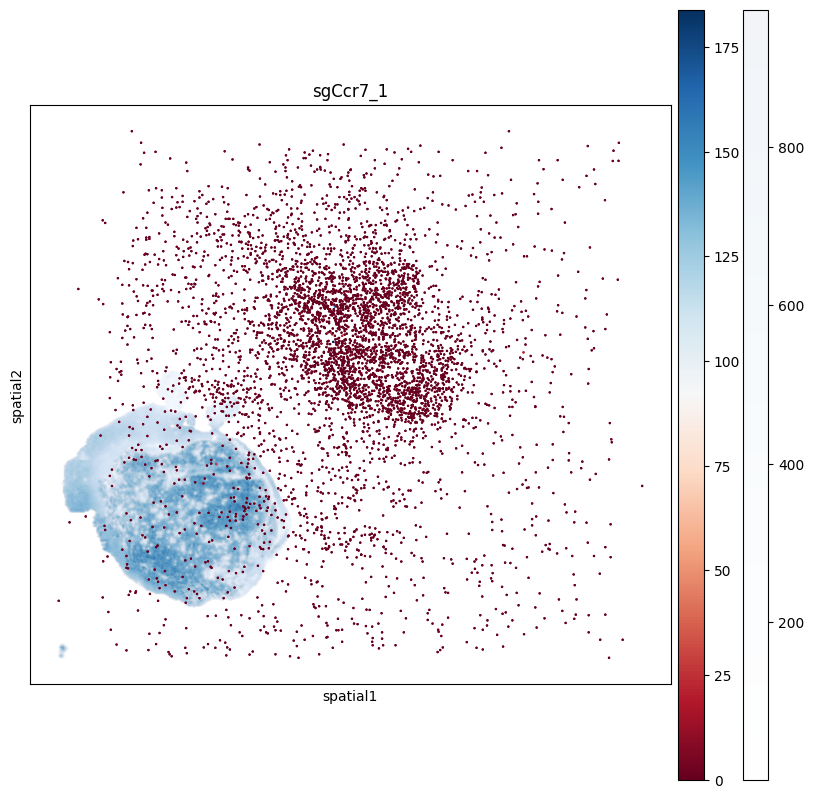

In [114]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colormap = cm.get_cmap("jet")
colors = colormap(np.linspace(0, 1, len(fdata_t.var_names)))
sq.pl.spatial_scatter(cdata_y, color="n_genes_by_counts", size=2, shape=None, library_id="spatial", ax=ax, alpha=0.05, cmap="Blues")
sq.pl.spatial_scatter(fdata_y, color="sgCcr7_1", size=2, shape=None, library_id="spatial", ax=ax, cmap="RdBu")
#for idx, guide in enumerate(fdata_t.var_names):
     #utils.plot_dot(fdata_t[fdata_t[:, guide].X.toarray() > 0], guide, ax=ax, square=False, color=colors[idx])

In [62]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [73]:
r_array = {}
r_dict = {}
r_dict_ = {}
for guide in fdata_t.var_names:
    name = guide.split("_")[0]
    #if name == "sgNon-targeting": continue
    if name in r_array:
        r_dict[name] = spearmanr(r_array[name], fdata_t[:, guide].X.toarray())[0]
        try: r_dict_[name] = pearsonr(r_array[name], fdata_t[:, guide].X.toarray())[0]
        except: r_dict_[name] = 0
    else:
        r_array[name] = fdata_t[:, guide].X.toarray()

In [74]:
r_df = pd.concat([pd.DataFrame(r_dict, index=['spearmanr']).T], axis=1)

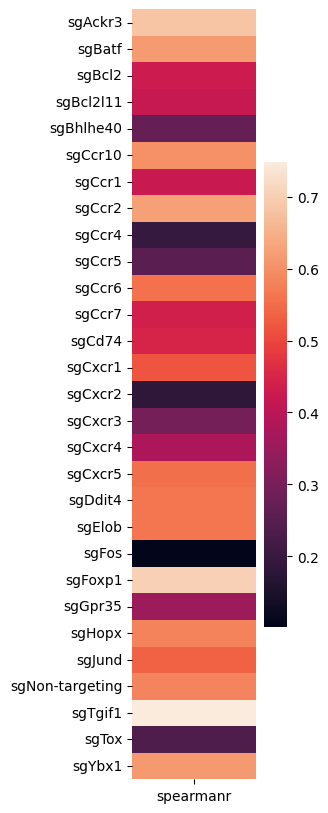

In [75]:
import seaborn as sns
plt.figure(figsize=(2, 10))
sns.heatmap(r_df)
plt.show()

In [77]:
fdata_t_ = utils.combine_guide_replicates(fdata_t)

In [78]:
fdata_y_ = utils.combine_guide_replicates(fdata_y)

In [80]:
fdata_t_.var_names

Index(['sgAckr3', 'sgBatf', 'sgBcl2', 'sgBcl2l11', 'sgBhlhe40', 'sgCcr1',
       'sgCcr10', 'sgCcr2', 'sgCcr4', 'sgCcr5', 'sgCcr6', 'sgCcr7', 'sgCd74',
       'sgCxcr1', 'sgCxcr2', 'sgCxcr3', 'sgCxcr4', 'sgCxcr5', 'sgCxcr6',
       'sgDdit4', 'sgElob', 'sgFos', 'sgFoxp1', 'sgGpr35', 'sgHopx', 'sgJun',
       'sgJund', 'sgKlf2', 'sgNon-targeting', 'sgTgif1', 'sgTox', 'sgYbx1'],
      dtype='object')

In [82]:
ntc_vec = fdata_t_[:, "sgNon-targeting"].X.toarray().flatten()
n_guides = len(fdata_t_.var_names)
r_df = pd.DataFrame(np.zeros((n_guides, n_guides)), index=fdata_t_.var_names, columns=fdata_t_.var_names)
for guide in fdata_t_.var_names:
    for y_guide in fdata_t_.var_names:
        r_df.loc[guide, y_guide] = r_df.loc[y_guide, guide] = spearmanr(fdata_t_[:, guide].X.toarray().flatten(), fdata_t_[:, y_guide].X.toarray().flatten())[0]

<Figure size 1000x800 with 0 Axes>

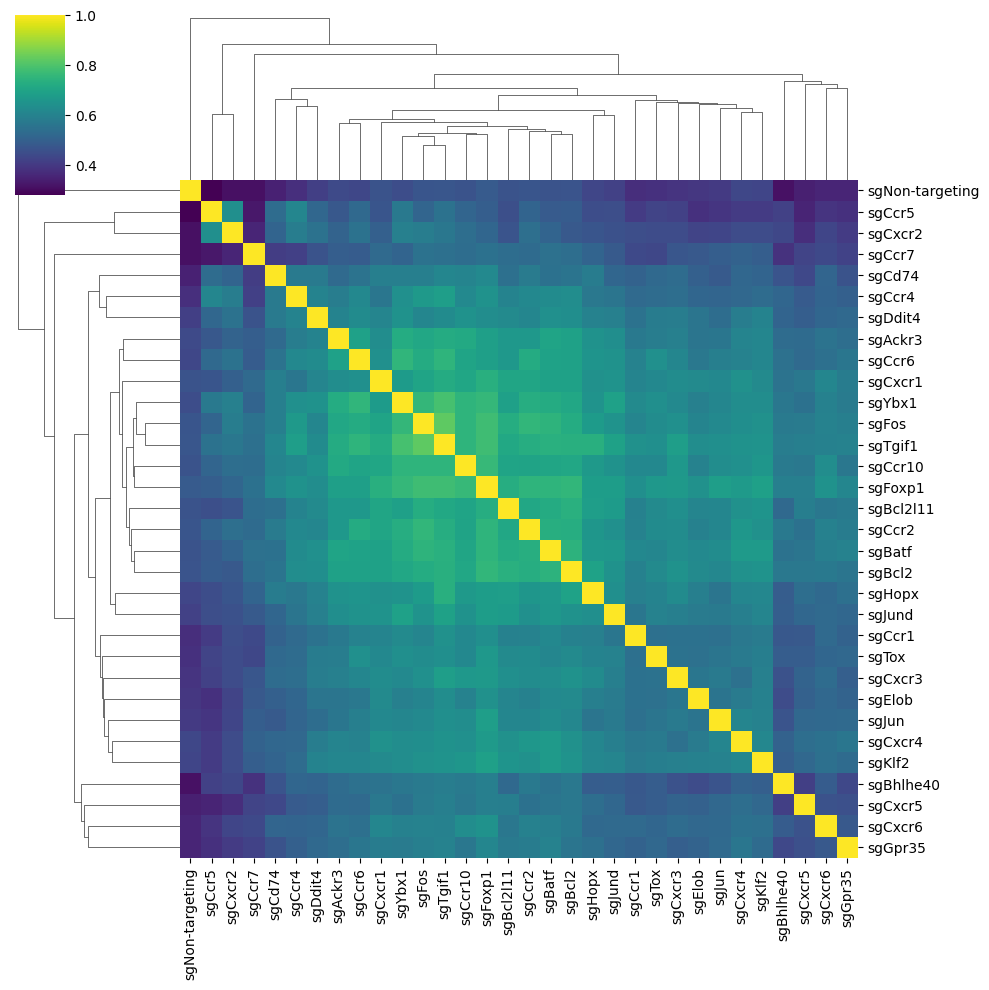

In [88]:
plt.figure(figsize=(10, 8))
sns.clustermap(r_df, cmap='viridis')